<a href="https://colab.research.google.com/github/alenready/ML_AI_ICT-Assignments/blob/main/ANN_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Mount Google Drive in Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

churn_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Churn_Modelling.csv')

##EDA:

In [ ]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
churn_data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# some columns are totally unproductive so let's remove them
churn_data.drop(['CustomerId','Surname'],axis=1,inplace=True)

In [ ]:
churn_data.head()

,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# some columns have text data so let's one hot encode them

# One-hot encode the 'Geography' column
Geography_dummies = pd.get_dummies(data=churn_data, columns=['Geography'], prefix='Geo')

# Map Gender values to numerical equivalents
Gender_dummies = churn_data['Gender'].map({'Female': 1, 'Male': 0})

# Add the new Gender_dummies column to Geography_dummies if needed
Geography_dummies['Gender'] = Gender_dummies


In [ ]:
Geography_dummies.head()

,RowNumber,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geo_France,Geo_Germany,Geo_Spain
0,1,619,1,42,2,0.00,1,1,1,101348.88,1,True,False,False
1,2,608,1,41,1,83807.86,1,0,1,112542.58,0,False,False,True
2,3,502,1,42,8,159660.80,3,1,0,113931.57,1,True,False,False
3,4,699,1,39,1,0.00,2,0,0,93826.63,0,True,False,False
4,5,850,1,43,2,125510.82,1,1,1,79084.10,0,False,False,True


In [ ]:
churn_data_encoded = Geography_dummies

<ipython-input-18-39fc372ef5ed>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=churn_data_encoded.Exited ,data=churn_data_encoded,palette='rocket')


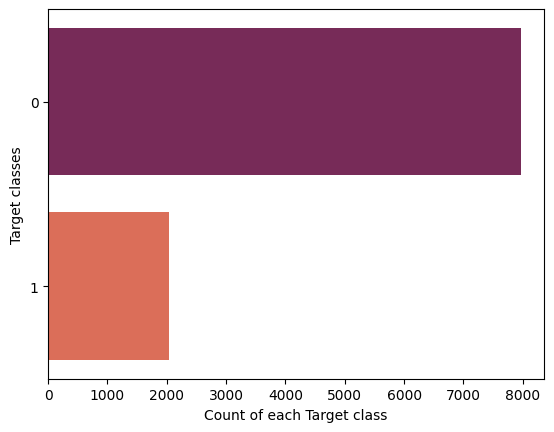

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(y=churn_data_encoded.Exited ,data=churn_data_encoded,palette='rocket')
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

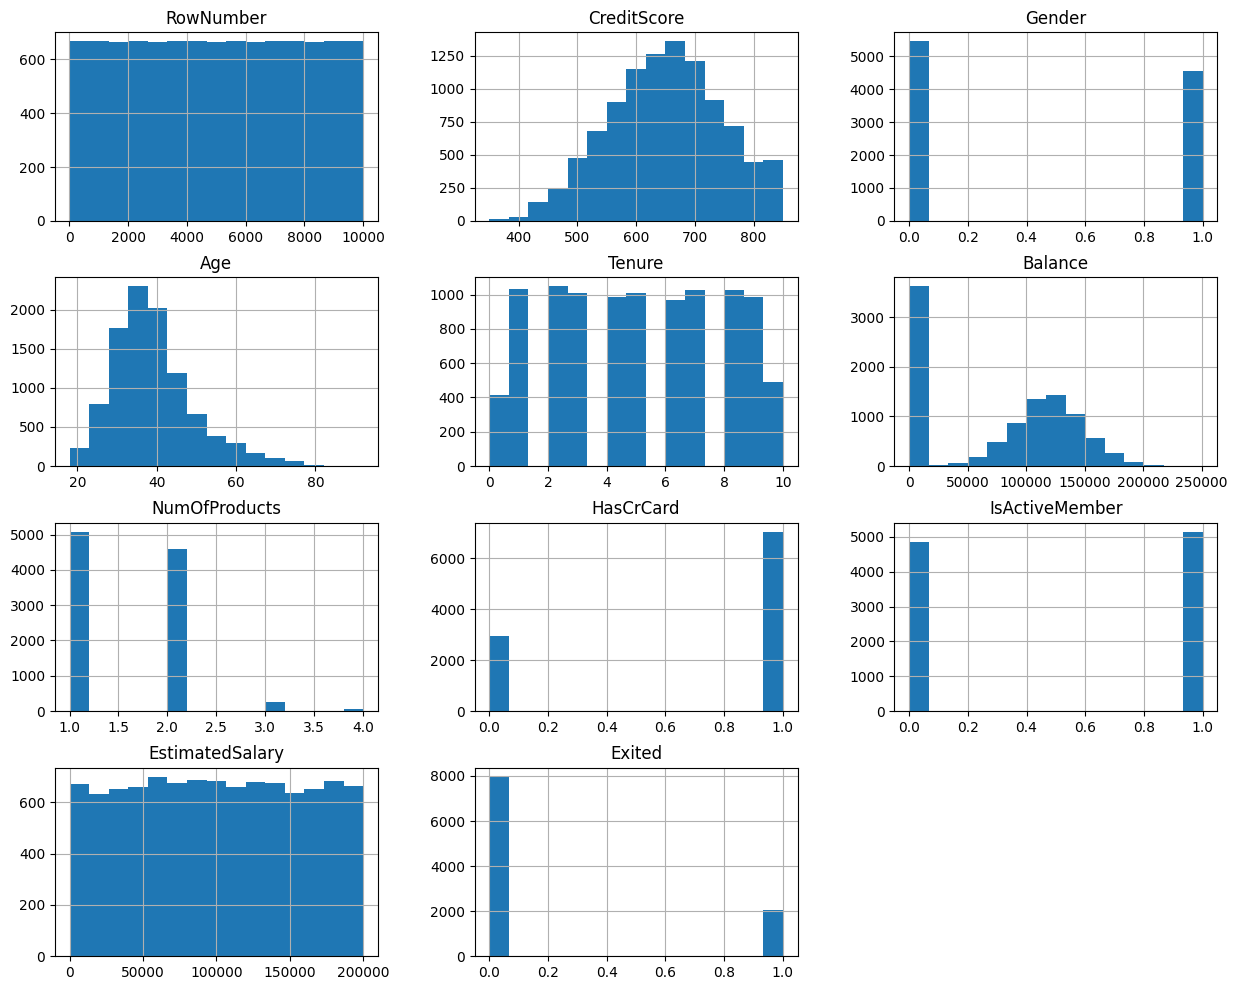

In [ ]:
churn_data_encoded.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

* **Age**: The distribution of customer ages shows a peak around 30–40 years. This indicates that the majority of customers fall within this age group. If age is relevant to the classification target (e.g., churn prediction), this range may be significant.
* **Balance**: Most customers have a low or zero balance, with a smaller proportion having higher balances. You might investigate whether customers with high balances are more or less likely to belong to a specific class.
* **CreditScore**: This follows a normal distribution, with most customers having an average credit score. You can check if the extremes (low or high credit scores) have a stronger correlation with your target variable.
* **EstimatedSalary**: This feature seems uniformly distributed, suggesting that salary may not have strong predictive power for classification unless combined with other features.
* **Tenure**: This is fairly evenly distributed across the range of values, which may indicate that tenure alone isn’t skewed or biased toward a specific target class.


In [ ]:
X = churn_data_encoded.drop(['Exited','RowNumber'],axis=1)
y = churn_data_encoded.Exited

In [ ]:
X.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geo_France,Geo_Germany,Geo_Spain
0,619,1,42,2,0.00,1,1,1,101348.88,True,False,False
1,608,1,41,1,83807.86,1,0,1,112542.58,False,False,True
2,502,1,42,8,159660.80,3,1,0,113931.57,True,False,False
3,699,1,39,1,0.00,2,0,0,93826.63,True,False,False
4,850,1,43,2,125510.82,1,1,1,79084.10,False,False,True


In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [ ]:
# Feature Scaling because yes we don't want one independent variable dominating the other and it makes computations easy
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#shape of X_train
X_train.shape

(6700, 12)

##ANN Implmentation

To set up an Artificial Neural Network (ANN), particularly with the Keras library, follow these steps to create a sequential layer of nodes and understand how to determine the number of nodes in each layer.

Install Required Libraries: Ensure you have TensorFlow and Keras installed. You can install them using pip:

In [ ]:
!pip install tensorflow keras

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# Initialize the Model: Create a sequential model where layers can be added one after another.
classifier = Sequential()

## How many Neurons and how many Layers?
- start simple with one hidden layer and a moderate number of neurons based on input/output sizes, then progressively experiment with complexity while monitoring performance on validation sets.

- Adjust based on the specific characteristics of your dataset and problem requirements.

**Input Layer**: The number of neurons should equal the number of input features in your dataset.

**Hidden Layers**:
A common starting point is to use a number of neurons between the size of the input layer and output layer.

For example, if you have 7 inputs and 1 output, you might start with one or two hidden layers with around 5-10 neurons each.

  **How Many Neurons per Hidden Layer?**

  - There’s no fixed rule, but common guidelines include:
  - Use a number of neurons roughly between the size of the input layer and the output layer. For example, if the input layer has 12 neurons and the output has 1, you might start with 6 neurons per hidden layer.
    
  - Experiment with values like 2ⁿ (e.g., 8, 16, 32, etc.).
    
  - Start small and increase the number of neurons if the model underfits.

**Output Layer**: The number of neurons corresponds to your output type:
- For binary classification, use 1 neuron with a sigmoid activation function.
- For multi-class classification, use as many neurons as there are classes with softmax activation.

In [ ]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12))
##  first hidden layer with units=6, meaning this layer will contain 6 neurons.
#   These neurons will take the 12 input features and learn to transform them through their activation functions (in this case, ReLU).

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer of 1 neuron
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In summary, while you have **12 input features** specified by `input_dim=12`, you do **not** need to have 12 neurons in the first hidden layer.

Instead, you define a smaller number of neurons (like 6) to allow for effective learning and transformation of those features.

This design choice helps manage complexity and encourages the model to learn meaningful patterns from the data.

## Compile the model:
Before you can train your model, you need to compile it. This step involves specifying the optimizer, loss function, and metrics you want to track during training.

1. **Loss Function**: Measures how far the predictions are from the true labels. Common choices:
  - binary_crossentropy: For binary classification (because of the sigmoid activation in the output layer).
  - categorical_crossentropy: For multi-class classification.
  - mean_squared_error: For regression problems.

2. **Optimizer**: Determines how the model updates weights (e.g., using gradient descent). Common choices:
  - **adam** (adaptive learning rate optimizer): A popular default choice.
  - **sgd** (stochastic gradient descent).

3. **Metrics**: Used to evaluate the model's performance.
  - For classification: Use **accuracy**.

In [ ]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

##Train the model

In [ ]:
# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100,verbose = 0)

# Instead of processing the entire dataset at once (which can be computationally expensive), the data is divided into smaller batches.
# In this case, the model processes 10 samples at a time before updating the weights.

#Epcohs: indicates how many times the learning algorithm will work through the entire training dataset.
# Here, the model will go through the entire dataset 100 times.
# More epochs can lead to better learning but also increases the risk of overfitting if not monitored properly

#verbose : Controls the amount of output printed during training.
# verbose=0: No output is printed during training.
# verbose=1: A progress bar is displayed (default).
# verbose=2: Displays one line per epoch.

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
score, acc = classifier.evaluate(X_train, y_train,batch_size=10)
print('Train score:', score)
print('Train accuracy:', acc)

670/670 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8381 - loss: 0.3911
Train score: 0.391184002161026
Train accuracy: 0.839402973651886


- The loss value (`0.391184002161026`) shown is the final loss after 100 epochs of training.
- The loss value reported (0.391 in this case) is the average loss over all batches in the dataset.
- How It Works:
  - The dataset is divided into batches of size 10.
  - For each batch:
    * The model calculates the predictions, computes the loss for the batch, and averages it.
    * At the end of the epoch or evaluation, the loss values for all batches are averaged again to give the final loss.

## Key Difference between Batch size parameter:

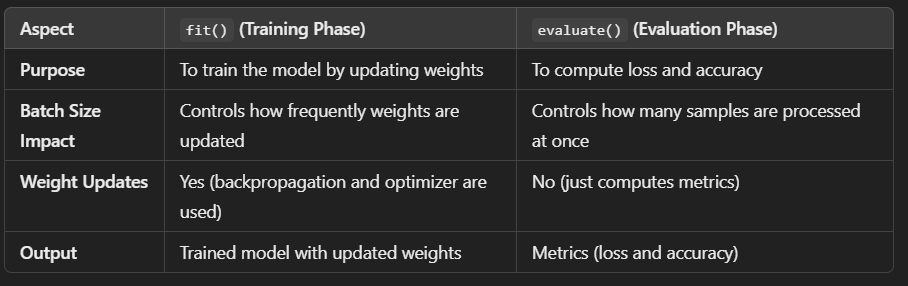

##Why Use Batch Sizes in Both?
`In fit():`

  - A small batch size results in more frequent weight updates, which can lead to faster convergence but noisier learning.
  - A large batch size provides smoother gradients but requires more memory and fewer weight updates.

`In evaluate()`:
  - Smaller batch sizes use less memory during evaluation, which can be useful for large datasets.
  - Larger batch sizes make evaluation faster because fewer iterations are needed.

##Evaluate your trained Model:

In [ ]:
score, acc = classifier.evaluate(X_test, y_test,batch_size=10)
print('Test score:', score)
print('Test accuracy:', acc)

330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8427 - loss: 0.3848
Test score: 0.39759600162506104
Test accuracy: 0.8421211838722229


###What happens here internally:

* The test dataset is divided into batches of size 10.
* If there are 1,000 test samples, there will be (1000/10 =) 100 batches.
* For each batch:
  - The model predicts the outputs (y_pred) using the current weights.
  - It computes the loss for that batch using the loss function (e.g., binary cross-entropy).
  - The accuracy for that batch is also calculated.
* Once all batches are processed:
  - The loss (score) is averaged across all batches.
  - The accuracy (acc) is averaged across all batches.

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[2520,   97],
       [ 424,  259]])

#Evaluation Metric

Text(0.5, 23.52222222222222, 'Predicted label')

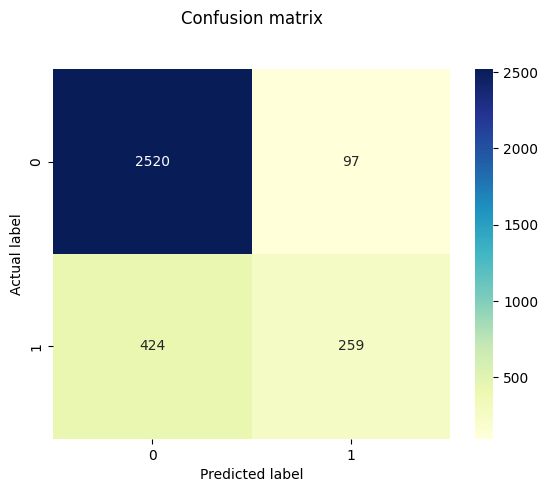

In [ ]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      2617
           1       0.73      0.38      0.50       683

    accuracy                           0.84      3300
   macro avg       0.79      0.67      0.70      3300
weighted avg       0.83      0.84      0.82      3300



104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


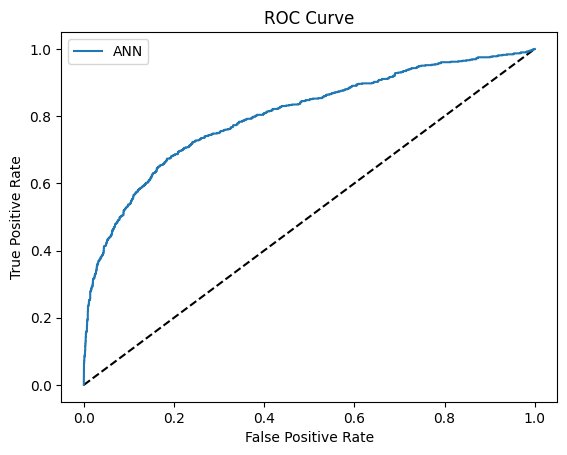

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Use predict() to get probabilities
y_pred_proba = classifier.predict(X_test)

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot the ROC curve
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal line for reference
plt.plot(fpr, tpr, label='ANN')  # Actual ROC curve
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


ROC curve is well above the diagonal baseline, which indicates that your model is performing better than random guessing.


- The curve is not close to the top-left corner (ideal classifier), but it shows reasonably good predictive power.
- The closer the curve is to the top-left corner, the better the model's ability to discriminate between positive and negative classes.

In [ ]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.8019803503503111

#Model Summary

In [ ]:
# Summarize the model
classifier.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 6)                   │              78 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 383 (1.50 KB)

 Trainable params: 127 (508.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 256 (1.00 KB)

- Evaluate the performance of your ANN on multiple training instances using k-fold cross-validation.
- Identify how consistent the model's performance is across different subsets of the training data.
- Compute statistics like the mean accuracy and variance to understand the model's stability.

# K-Fold Validation

In [ ]:
!pip install scikeras


In [ ]:
# Part 4 - Evaluating, Improving and Tuning the ANN

from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense

def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu', input_dim=12))
    classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))
    classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
    classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return classifier

# Wrapping the model
classifier = KerasClassifier(model=build_classifier, batch_size=10, epochs=100, verbose=0)

# Performing k-fold cross-validation
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10)

# Calculate mean and variance
mean = accuracies.mean()
variance = accuracies.std()

print("Mean Accuracy:", mean)
print("Accuracy Variance:", variance)



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lo

Mean Accuracy: 0.8326865671641791
Accuracy Variance: 0.010198519585585987


In [ ]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')